<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/News_Sentiment_with_Alpha_Vantage_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from google.colab import userdata
alpha_V_key = userdata.get('alpha_V')

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
symbol = 'CVX'

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={alpha_V_key}'
r = requests.get(url)
news_data = r.json()

In [ ]:
news_data

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': 'Market Whales and Their Recent Bets on CVX Options - Chevron  ( NYSE:CVX ) ',
   'url': 'https://www.benzinga.com/insights/options/25/02/43745101/market-whales-and-their-recent-bets-on-cvx-options',
   'time_published': '20250214T201524',
   'authors': ['Benzinga Insights'],
   'summary': "Investors with a lot of money to spend have taken a bullish stance on Chevron CVX. We noticed this today when the trades showed up on publicly available options history that we track here at Benzinga. Whether these are institutions or just wealthy individuals, we don't know.",
   'banner_image': 'https://www.benzinga.com/files/images/story/2025/1739564121_0.png',
   'source': 'Benzinga',
   'categor

In [ ]:
news_data['feed'][0]['ticker_sentiment'][0]

{'ticker': 'CVX',
 'relevance_score': '0.704243',
 'ticker_sentiment_score': '0.345482',
 'ticker_sentiment_label': 'Somewhat-Bullish'}

In [ ]:
#Extract
ticker_scores = []
for data in news_data['feed']:
  sentiment_scores = []
  sentiment_scores.append(data['ticker_sentiment'])
  for tickers in sentiment_scores:
    for ticker in tickers:
      ticker_scores.append(ticker)

In [ ]:
ticker_scores

In [ ]:
ticker_news = []
for blob in ticker_scores:
  if blob['ticker'] == symbol:
    ticker_news.append(blob)

In [ ]:
ticker_news

In [ ]:
tick_news_df = pd.DataFrame(ticker_news)
tick_news_df.drop(columns=['ticker'], inplace=True)

In [ ]:
tick_news_df.head()

,relevance_score,ticker_sentiment_score,ticker_sentiment_label
0,0.704243,0.345482,Somewhat-Bullish
1,0.626259,0.473478,Bullish
2,0.448316,-0.018104,Neutral
3,0.565145,0.311496,Somewhat-Bullish
4,0.546745,0.200354,Somewhat-Bullish


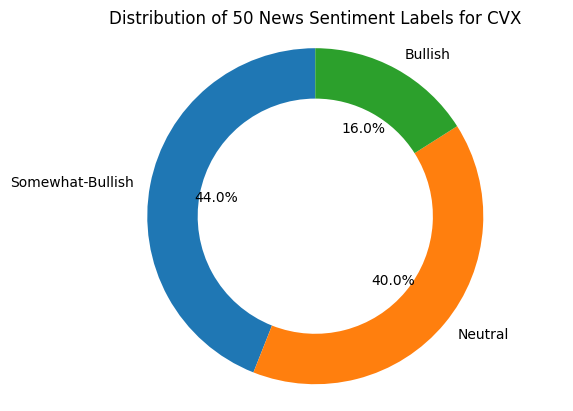

In [ ]:
sentiment_counts = tick_news_df['ticker_sentiment_label'].value_counts()
news_counts = len(tick_news_df['ticker_sentiment_label'])
# Create the pie chart
plt.figure()
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.3))
plt.title(f'Distribution of {news_counts} News Sentiment Labels for ' + symbol)
plt.axis('equal')
plt.show()

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi